In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


# Data Cleansing

The data has around 55M rows (6GB). Too heavy for my Macbook, I only use the first 1M rows and delete the rest. CSV handling is executed outside of the notebook.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [6]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


Hmm, some rows has fare amount negative? Remove those.

In [7]:
train = train[train.fare_amount > 0]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999933.000000,999933.000000,999933.000000,999923.000000,999923.000000,999933.000000
mean,11.349071,-72.526767,39.929075,-72.528356,39.920225,1.684938
std,9.821502,12.057681,7.626093,11.323010,8.200913,1.323925
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [8]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [9]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

We noticed that there are few rows with NULL values, remove those!

In [10]:
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [11]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000
mean,11.348945,-72.526826,39.929108,-72.528356,39.920225,1.684955
std,9.821201,12.057522,7.626026,11.323010,8.200913,1.323921
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


Some longitude and latitude values are way off the the mean and medium, remove those too.
Actually, longitude should be within -90 to 90 and latitude is in the range from -180 to 180


In [12]:
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180])).index, axis=0)
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)
train = train.drop(((train[train['dropoff_longitude']<-180])|(train[train['dropoff_longitude']>180])).index, axis=0)

In [13]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999883.000000,999883.000000,999883.000000,999883.000000,999883.000000,999883.000000
mean,11.348918,-72.517430,39.926812,-72.515719,39.926137,1.684953
std,9.821187,10.393175,6.089191,10.395685,6.092901,1.323910
min,0.010000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767153,-73.963654,40.768129,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,208.000000


In [14]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [15]:
train = train.drop(train[train['passenger_count']>6].index, axis=0)

In [16]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000
mean,11.348926,-72.517502,39.926852,-72.515792,39.926177,1.684747
std,9.821188,10.392928,6.089063,10.395437,6.092773,1.307734
min,0.010000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767153,-73.963654,40.768129,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000


# Feature engineering
I am gonna extract and create columns for year, month, day, dayofweek and hour

In [22]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [23]:
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [24]:
data = [train, test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

The distance between the pickup point and drop off point can be calculated by using Haversine formula
https://en.wikipedia.org/wiki/Haversine_formula

https://stackoverflow.com/questions/27928/


In [31]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # Unit is kilometer

In [49]:
def haversine_distance(lat1, long1, lat2, long2):
    R = 6371  #radius of earth in kilometers
    #R = 3959 #radius of earth in miles
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    
    delta_phi = np.radians(lat2-lat1)
    delta_lambda = np.radians(long2-long1)
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    #d = R*c
    d = (R * c) #in kilometers
    return d

In [50]:
for i in data:
    i['distance'] = haversine_distance(i['pickup_latitude'], i['pickup_longitude'], i['dropoff_latitude'], i['dropoff_longitude'])

In [51]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,distance
count,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000,999882.000000
mean,11.348926,-72.517502,39.926852,-72.515792,39.926177,1.684747,2011.740988,6.268078,15.697898,3.039857,13.509585,18.856622
std,9.821188,10.392928,6.089063,10.395437,6.092773,1.307734,1.860720,3.436254,8.682463,1.949962,6.513758,359.980494
min,0.010000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212987
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.115910
75%,12.500000,-73.967095,40.767153,-73.963654,40.768129,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.882184
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,12594.704725


Let's see the relation between the distance and fare amount

Text(0,0.5,'Distance')

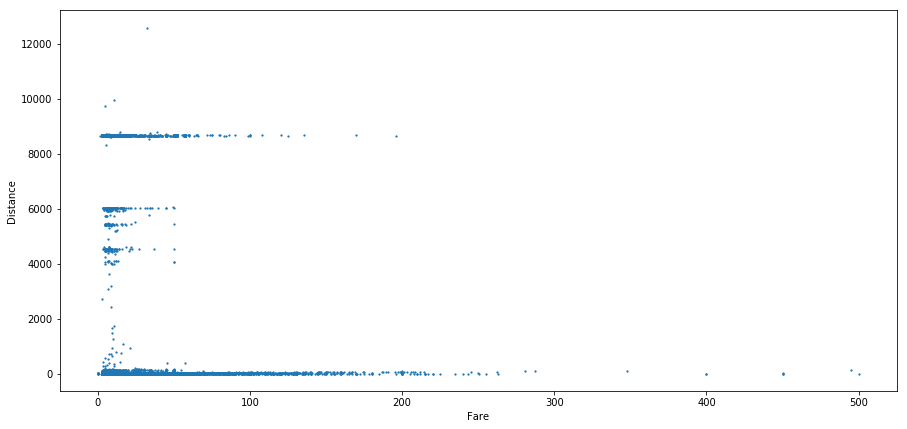

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['fare_amount'], y=train['distance'],s=1.5)
plt.xlabel('Fare')
plt.ylabel('Distance')


In [54]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour',
       'distance'],
      dtype='object')

In [56]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [58]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test

In [60]:
x_train.shape

(999882, 11)

# Modelling

Using random forest method for prediction

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

In [62]:
submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.600
1,2015-01-27 13:08:24.0000003,11.150
2,2011-10-08 11:53:44.0000002,4.580
3,2012-12-01 21:12:12.0000002,9.300
4,2012-12-01 21:12:12.0000003,14.450
5,2012-12-01 21:12:12.0000005,10.450
6,2011-10-06 12:10:20.0000001,5.500
7,2011-10-06 12:10:20.0000003,48.840
8,2011-10-06 12:10:20.0000002,14.597
9,2014-02-18 15:22:20.0000002,6.300
